Loading all the libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import scipy as sp
import matplotlib.pyplot as plt

3.a)

Defining the Black-Scholes functions as well as the trilattice models

In [3]:
def BScallPrice(sigma,K,tau,S,r):
    d1 = (np.log(S/K)+(r+(1/2)*sigma**2)*tau)/(sigma*np.sqrt(tau));
    d2 = d1-sigma*np.sqrt(tau);
    c = S*sps.norm.cdf(d1)-K*np.exp(-r*tau)*sps.norm.cdf(d2);
    return c

def BSputPrice(sigma,K,tau,S,r):    
    d1 = (np.log(S/K)+(r+(1/2)*sigma**2)*tau)/(sigma*np.sqrt(tau));
    d2 = d1-sigma*np.sqrt(tau);
    c = S*sps.norm.cdf(d1)-K*np.exp(-r*tau)*sps.norm.cdf(d2);
    p = c+K*np.exp(-r*tau)-S;
    return p

In [4]:
def TrinomialEuCall(S0,K,r,sigma,T,N): 
    deltaT = T/N
    deltaX=sigma*deltaT**0.5;#rule of thumb
    nu = r-(1/2)*sigma**2;
    discount = np.exp(-r*deltaT);
    p_u = (1/2)*((sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2+nu*deltaT/deltaX);
    p_m = (1-(sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2);
    p_d = (1/2)*((sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2-nu*deltaT/deltaX);
    pm=1-p_u-p_d
    # set up S values (at maturity)
    Svals = np.zeros((2*N+1,1));
    Svals[0] = S0*np.exp(N*deltaX);
    exp_dX = np.exp(-deltaX); 
    for j in range(1,2*N+1):
        Svals[j] = exp_dX*Svals[j-1];     
    #set up lattice and terminal values 
    Cvals = np.zeros((2*N+1,N+1))
      
    for j in range(0,2*N+1):
        Cvals[j,N] = max(Svals[j]-K,0);

    for j in range(N-1,-1,-1):
        for i in range(N-j,N+j+1):
            Cvals[i,j] =discount*(p_u*Cvals[i-1,j+1]+p_m*Cvals[i,j+1]+p_d*Cvals[i+1,j+1]);

    price = Cvals[N,0];
    return price;


def TrinomialEuPut(S0,K,r,sigma,T,N): 
    deltaT = T/N
    deltaX=sigma*deltaT**0.5;#rule of thumb
    nu = r-(1/2)*sigma**2;
    discount = np.exp(-r*deltaT);
    p_u = (1/2)*((sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2+nu*deltaT/deltaX);
    p_m = (1-(sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2);
    p_d = (1/2)*((sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2-nu*deltaT/deltaX);
    pm=1-p_u-p_d
    # set up S values (at maturity)
    Svals = np.zeros((2*N+1,1));
    Svals[0] = S0*np.exp(N*deltaX);
    exp_dX = np.exp(-deltaX); 
    for j in range(1,2*N+1):
        Svals[j] = exp_dX*Svals[j-1];     
    #set up lattice and terminal values 
    Pvals = np.zeros((2*N+1,N+1))
      
    for j in range(0,2*N+1):
        Pvals[j,N] = max(K-Svals[j],0);

    for j in range(N-1,-1,-1):
        for i in range(N-j,N+j+1):
            Pvals[i,j] = discount*(p_u*Pvals[i-1,j+1]+p_m*Pvals[i,j+1]+p_d*Pvals[i+1,j+1]);
    price = Pvals[N,0];
    return price;


PUT Option

One month

In [55]:
S0 = 15
sigma = 0.30
K = 19
T = 9/12
N = 9
r = 0.07

TrinomialEuPut(S0,K,r,sigma,T,N)

3.613697521551933

One day

In [56]:
N = 9*30
TrinomialEuPut(S0,K,r,sigma,T,N)

3.6285113668654803

In [57]:
BSputPrice(sigma,K,T,S0,r)

3.627787572028005

We can see that as expected as N increases the Trilattice price converges to the Black Scholes correct price, under the Geometric Brownian motion dynamics

CALL Option

One month

In [8]:
S0 = 15
sigma = 0.30
K = 19
T = 9/12
N = 9
r = 0.07

TrinomialEuCall(S0,K,r,sigma,T,N)

0.5841332520395797

One day

In [9]:
N = 252
TrinomialEuCall(S0,K,r,sigma,T,N)

0.5994403728561892

In [10]:
BScallPrice(sigma,K,T,S0,r)

0.5995554719677814

3.b)

From now on we set N = 9, meaning montlhy frequency

In [58]:
N = 9

3.b)

We define the functions for the pay later options by changing the payoff at termanl date T

In [66]:
def TrinomialEurCallPayLater(C,S0,K,r,sigma,T,N): 
    deltaT = T/N
    deltaX=sigma*deltaT**0.5;#rule of thumb
    nu = r-(1/2)*sigma**2;
    discount = np.exp(-r*deltaT);
    p_u = (1/2)*((sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2+nu*deltaT/deltaX);
    p_m = (1-(sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2);
    p_d = (1/2)*((sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2-nu*deltaT/deltaX);
    pm=1-p_u-p_d
    
    # set up S values (at maturity)
    Svals = np.zeros((2*N+1,1)); 
    Svals[0] = S0*np.exp(N*deltaX); 
    exp_dX = np.exp(-deltaX); 
    for j in range(1,2*N+1):
        Svals[j] = exp_dX*Svals[j-1];
        
    #set up lattice and terminal values 
    Cvals = np.zeros((2*N+1,N+1))
    for j in range(0,2*N+1): 
        if Svals[j]>K:
            Cvals[j,N] = Svals[j]-K-C 
        else:
            Cvals[j,N] = 0 

    for j in range(N-1,-1,-1):
        for i in range(N-j,N+j+1):
            Cvals[i,j] =discount*(p_u*Cvals[i-1,j+1]+p_m*Cvals[i,j+1]+p_d*Cvals[i+1,j+1]);
    
    price = max(Cvals[N,0],0);
    return price;


def TrinomialEurPutPayLater(P,S0,K,r,sigma,T,N): 
    deltaT = T/N
    deltaX=sigma*deltaT**0.5;#rule of thumb
    nu = r-(1/2)*sigma**2;
    discount = np.exp(-r*deltaT);
    p_u = (1/2)*((sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2+nu*deltaT/deltaX);
    p_m = (1-(sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2);
    p_d = (1/2)*((sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2-nu*deltaT/deltaX);
    pm=1-p_u-p_d
    
    # set up S values (at maturity)
    Svals = np.zeros((2*N+1,1));
    Svals[0] = S0*np.exp(N*deltaX);
    exp_dX = np.exp(-deltaX); 
    for j in range(1,2*N+1):
        Svals[j] = exp_dX*Svals[j-1];  
        
    #set up lattice and terminal values 
    Pvals = np.zeros((2*N+1,N+1))
    for j in range(0,2*N+1):
        if Svals[j]<K:
            Pvals[j,N] = K-Svals[j]-P
        else:
            Pvals[j,N] = 0

    for j in range(N-1,-1,-1):
        for i in range(N-j,N+j+1):
            Pvals[i,j] =discount*(p_u*Pvals[i-1,j+1]+p_m*Pvals[i,j+1]+p_d*Pvals[i+1,j+1]);
    
    price = max(Pvals[N,0],0);
    return price;


We do some tests to look for starting values in the minimization

In [67]:
P = 3.6

TrinomialEurPutPayLater(P,S0,K,r,sigma,T,N)

1.149981790319015

In [68]:
C = 3.6

TrinomialEurCallPayLater(C,S0,K,r,sigma,T,N)

0

In [69]:
def Minimize_trilattice_put(S0,K,r,sigma,T,N, startingval): 
    def TrillaticePutPrice_sig(P):
        return (TrinomialEurPutPayLater(P,S0,K,r,sigma,T,N))
    res = sp.optimize.minimize(TrillaticePutPrice_sig, startingval, method = 'Nelder-Mead')
    return res

In [70]:
startingval = 4.1

Minimize_trilattice_put(S0,K,r,sigma,T,N, startingval)

 final_simplex: (array([[5.535     ],
       [5.53505005]]), array([0., 0.]))
           fun: 0.0
       message: 'Optimization terminated successfully.'
          nfev: 47
           nit: 17
        status: 0
       success: True
             x: array([5.535])

In [71]:
P = 5.535

TrinomialEurPutPayLater(P,S0,K,r,sigma,T,N)

0

In [72]:
def Minimize_trilattice_call(S0,K,r,sigma,T,N, startingval): 
    def TrillaticeCallPrice_sig(C):
        return np.mean(TrinomialEurCallPayLater(C,S0,K,r,sigma,T,N))
    res = sp.optimize.minimize(TrillaticeCallPrice_sig, startingval, method = 'Nelder-Mead')
    return res

In [73]:
startingval = 0

Minimize_trilattice_call(S0,K,r,sigma,T,N, startingval)

 final_simplex: (array([[3.07175  ],
       [3.0718125]]), array([0., 0.]))
           fun: 0.0
       message: 'Optimization terminated successfully.'
          nfev: 69
           nit: 28
        status: 0
       success: True
             x: array([3.07175])

In [74]:
C = 3.072

TrinomialEurCallPayLater(C,S0,K,r,sigma,T,N)

0

We derive the true premium using the results found in Ex 2) using both methodologies to check for mistakes

In [75]:
def PayLaterPutPremium(sigma,K,tau,S,r):
    d1 = (np.log(S/K)+(r+(1/2)*sigma**2)*tau)/(sigma*np.sqrt(tau));
    d2 = d1-sigma*np.sqrt(tau);
    c = S*sps.norm.cdf(d1)-K*np.exp(-r*tau)*sps.norm.cdf(d2);
    p = c+K*np.exp(-r*tau)-S;
    
    premium = np.exp(r*tau)*p/sps.norm.cdf(-d2)
    return premium

In [76]:
PayLaterPutPremium(sigma,K,T,S0,r)

4.785759700971706

In [77]:
def BSEuDigitalPut(sigma,K,tau,S,r):
    d1 = (np.log(S/K)+(r+(1/2)*sigma**2)*tau)/(sigma*np.sqrt(tau));
    d2 = d1-sigma*np.sqrt(tau);
    p = np.exp(-r*tau)*sps.norm.cdf(-d2);
    return (p)

def BSEuPayLaterPut(S0,K,r,sigma,T):
    res = BSputPrice(sigma,K,T,S0,r) / BSEuDigitalPut(sigma,K,T,S0,r)
    return res

In [78]:
BSEuPayLaterPut(S0,K,r,sigma,T)

4.785759700971705

In [79]:
def PayLaterCallPremium(sigma,K,tau,S,r):
    d1 = (np.log(S/K)+(r+(1/2)*sigma**2)*tau)/(sigma*np.sqrt(tau));
    d2 = d1-sigma*np.sqrt(tau);
    c = S*sps.norm.cdf(d1)-K*np.exp(-r*tau)*sps.norm.cdf(d2);
    
    premium = np.exp(r*tau)*c/sps.norm.cdf(d2)
    return premium

In [80]:
PayLaterCallPremium(sigma,K,T,S0,r)

3.1420550224325945

In [81]:
def BSEuDigitalCall(sigma,K,tau,S,r):
    d1 = (np.log(S/K)+(r+(1/2)*sigma**2)*tau)/(sigma*np.sqrt(tau));
    d2 = d1-sigma*np.sqrt(tau);
    c = np.exp(-r*tau)*sps.norm.cdf(d2);
    return (c)

def BSEuPayLaterCall(S0,K,r,sigma,T):
    res = BScallPrice(sigma,K,T,S0,r) / BSEuDigitalCall(sigma,K,T,S0,r)
    return res

In [82]:
BSEuPayLaterCall(S0,K,r,sigma,T)

3.1420550224325945

We can see that prices are similar to the trilattice models, and surely will converge increasing N

3.d)

Trinomial America put

In [83]:
S0 = 15
K = 12
r = 0.07
sigma = 0.3
T = 0.75
N = 12

We define the Trinomial lattice for the American Put

In [84]:
def TrinomialAmPut(S0,K,r,sigma,T,N): 
    deltaT = T/N
    deltaX=sigma*deltaT**0.5;#rule of thumb
    nu = r-(1/2)*sigma**2;
    discount = np.exp(-r*deltaT);
    p_u = (1/2)*((sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2+nu*deltaT/deltaX);
    p_m = (1-(sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2);
    p_d = (1/2)*((sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2-nu*deltaT/deltaX);
    pm=1-p_u-p_d
    # set up S values (at maturity)
    Svals = np.zeros((2*N+1,1));
    Svals[0] = S0*np.exp(N*deltaX);
    exp_dX = np.exp(-deltaX); 
    for j in range(1,2*N+1):
        Svals[j] = exp_dX*Svals[j-1];     
    #set up lattice and terminal values 
    Pvals = np.zeros((2*N+1,N+1))
      
    for j in range(0,2*N+1):
        Pvals[j,N] = max(K-Svals[j],0);

    for j in range(N-1,-1,-1):
        for i in range(N-j,N+j+1):
            hold= discount*(p_u*Pvals[i-1,j+1]+p_m*Pvals[i,j+1]+p_d*Pvals[i+1,j+1])
            Pvals[i,j] = max(K-Svals[j],hold);
    price = Pvals[N,0];
    return price;

In [85]:
TrinomialAmPut(S0,K,r,sigma,T,N)

0.26372671108558327

We define the function for the pay later Put American option

In [86]:
def LatticeAmPutPayLater(P,S0,K,r,sigma,T,N): 
    deltaT = T/N
    deltaX=sigma*deltaT**0.5;#rule of thumb
    nu = r-(1/2)*sigma**2;
    discount = np.exp(-r*deltaT);
    p_u = (1/2)*((sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2+nu*deltaT/deltaX);
    p_m = (1-(sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2);
    p_d = (1/2)*((sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2-nu*deltaT/deltaX);
    pm=1-p_u-p_d
    # set up S values (at maturity)
    Svals = np.zeros((2*N+1,1));
    Svals[0] = S0*np.exp(N*deltaX);
    exp_dX = np.exp(-deltaX); 
    for j in range(1,2*N+1):
        Svals[j] = exp_dX*Svals[j-1];     
    #set up lattice and terminal values 
    Pvals = np.zeros((2*N+1,N+1))
      
    for j in range(0,2*N+1):
        if Svals[j]<K:
            Pvals[j,N] = K-Svals[j]-P
        else:
            Pvals[j,N] = 0

    for j in range(N-1,-1,-1):
        for i in range(N-j,N+j+1):
            hold= discount*(p_u*Pvals[i-1,j+1]+p_m*Pvals[i,j+1]+p_d*Pvals[i+1,j+1])
            Pvals[i,j] = max(K-Svals[j]-P,hold);
    price =  max(Pvals[N,0],0);
    return price;

In [87]:
P = 0.263
LatticeAmPutPayLater(P,S0,K,r,sigma,T,N)

0.2203195944689663

Minimizing function to find P such that the American option price is 0

In [88]:
def Minimize_trilattice_put_AM(S0,K,r,sigma,T,N, startingval): 
    def TrillaticePutPrice_sig(P):
        return (LatticeAmPutPayLater(P,S0,K,r,sigma,T,N))
    res = sp.optimize.minimize(TrillaticePutPrice_sig, startingval, method = 'Nelder-Mead')
    return res

In [89]:
startingval = 1.1

Minimize_trilattice_put_AM(S0,K,r,sigma,T,N, startingval)

 final_simplex: (array([[1.705     ],
       [1.70505371]]), array([0., 0.]))
           fun: 0.0
       message: 'Optimization terminated successfully.'
          nfev: 43
           nit: 16
        status: 0
       success: True
             x: array([1.705])

In [90]:
P = 1.705
LatticeAmPutPayLater(P,S0,K,r,sigma,T,N)

0

For this approximation the values are still distant

Ex 4)

We define all the functions needed for the Heston model, as well as the Heston model for a pay later option with the B-S approximation for the digital option

In [91]:
def Heston_f(u, params, S, tau, r, v0, type):   
    kappa = params[0];
    vbar = params[1];
    eta  = params[2];
    rho  = params[3];
    if type == 1:
        uu = 0.5;
        bb = kappa - rho*eta;
    else:
        uu = -0.5;
        bb = kappa;
        
    aa = kappa*vbar;
    dd = np.sqrt((1j*u*rho*eta - bb)**2 - eta**2*(1j*u*2*uu - u**2));
    gg = (bb - rho*eta*u*1j + dd)/(bb - rho*eta*u*1j - dd);
    
    CC = r*u*1j*tau + aa/eta**2*((bb - rho*eta*u*1j + dd)*tau - 2*np.log((1-gg*np.exp(dd*tau))/(1-gg)));
    DD = (bb - rho*eta*u*1j + dd)/eta**2*((1-np.exp(dd*tau))/(1-gg*np.exp(dd*tau)));
    
    return np.exp(CC + DD*v0 + 1j*u*np.log(S));

def Heston_P_integrand(u, params, S, K, tau, r, v0, type):
    return  np.real(np.exp(-1j*u*np.log(K))*Heston_f(u, params, S, tau, r, v0, type)/(1j*u));

def Heston_P(params, S, K, tau, r, v0, type):
    intgral=sp.integrate.quad(Heston_P_integrand, 0, 500, args=(params, S, K, tau, r, v0, type));
    return 0.5 + 1/np.pi *intgral[0]

def Heston_Call(params, S, K, tau, r, v0):
    call = S*Heston_P(params, S, K, tau, r, v0, 1) - K*np.exp(-r*tau)*Heston_P(params, S, K, tau, r, v0, 2);
    return call

def Heston_Paylater_Call(params, S, K, tau, r, v0):
    res = Heston_Call(params, S, K, tau, r, v0) / BSEuDigitalCall(sigma,K,T,S0,r)
    return res 

In [92]:
S0=15
sigma=0.3
r=0.07
T=9/12
N=9

kappa=2
vbar=sigma**2
eta=0.25
rho=0

params=(kappa,vbar,eta,rho)


We create a vector of values for K using linspace

In [93]:
K = np.linspace(2,28,200)

For different values of rho we compute the difference between Heston and B-S. We can see that when rho is negative, the B-S model overprices the option w.r.t to the Heston model, whereas the opposite happens for rho >= 0. Furthermore it is worth noticing that when K is very low, thus the option is deep ITM then the difference is negligible

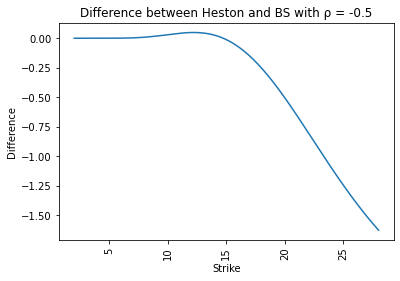

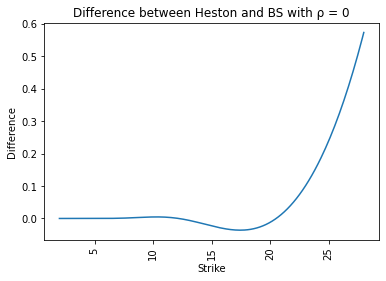

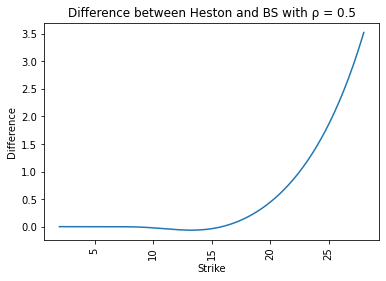

In [94]:
for i in (-0.5,0,0.5):
    rho = i
    params=(kappa,vbar,eta,rho)
    diff = []
    for j in K:
        res = Heston_Paylater_Call(params, S0, j, T, r, vbar) - PayLaterCallPremium(sigma,j,T,S0,r)
        diff.append(res)
    
    plt.plot(K,diff)
    plt.title('Difference between Heston and BS with ρ = ' + str(i))
    plt.xlabel('Strike')
    plt.xticks(rotation=90)
    plt.ylabel('Difference')
    plt.show()

We do the same analysis for different values of eta, in this case the Heston model consistently overprice the option w.r.t the B-S model, except for values really close to S0, where the B-S price is higher

In [95]:
rho=0

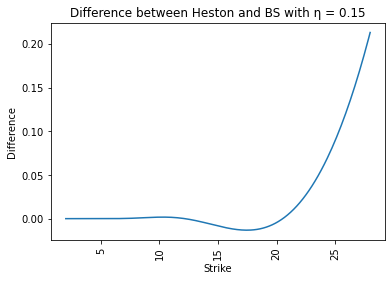

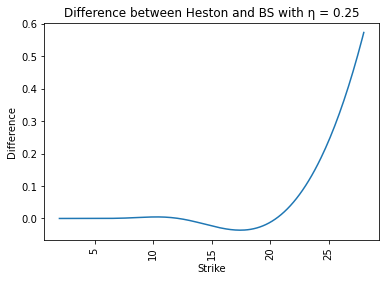

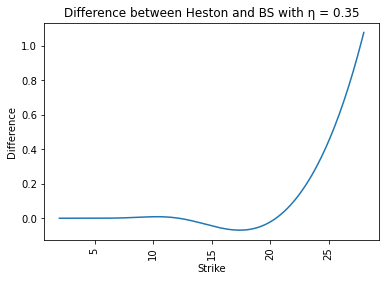

In [96]:
for i in (0.15,0.25,0.35):
    eta = i
    params=(kappa,vbar,eta,rho)
    diff = []
    for j in K:
        res =  Heston_Paylater_Call(params, S0, j, T, r, vbar) - PayLaterCallPremium(sigma,j,T,S0,r)
        diff.append(res)
    
    plt.plot(K,diff)
    plt.title('Difference between Heston and BS with η = ' + str(i))
    plt.xlabel('Strike')
    plt.xticks(rotation=90)
    plt.ylabel('Difference')
    plt.show()